### Missing Values- Feature Engineering- Day 1

Lifecycle of a Data Science Projects

   1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
   
   2. Feature Engineering---
                            Handling Missing Values
                            Feature selection
                            Handling categorical values
                            EDA

    


Why are their Missing values?? Survey--Depression Survey

    They hesitate to put down the information
    Survey informations are not that valid
    Men--salary
    Women---age
    People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources


#### What are the different types of Missing Data?

1.  Missing Completely at Random (MCAR): A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

2. Missing Data Not At Random (MNAR): Systematic missing values.  When data is MNAR, there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

3. Missing At Random (MAR): 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv('titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### here we see (neglecting Embarked column) 2 columns Age and Cabin has missing values we need to know if there is any relation between them
#### as per MCAR missing variable.
#### y there is so many missing values in age and cabin
#### this data is collected after the accidant has happened. So here the missing values of Age and Cabin is not MCAR. 
#### As both the datas are collected after the accidant has occured.(MNAR)


In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### Above Embarked shows missing completely at Random (MCAR)

In [6]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0) # if there is null value we replace it with 1 else 0

## find %age of null/ missing values
df['cabin_null'].mean() * 100

77.10437710437711

In [7]:
# now we will try to understand that number of people who survived should not have any missing values in Cabin column as data is
# collected after the crash.

df.groupby(['Survived'])['cabin_null'].mean()

# for survived we 60 % null values and those who do not survived they have 87% null values
## This says MNAR

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### All the techniques of handling Missing values

1. Mean/ Median/ Mode replacement                                     (here)
2. Random Sample Imputation                                           (here)
3. Capturing NAN values with a new feature                            (here)
4. End of Distribution imputation                                     (here)
5. Arbitrary Imputation                                               (here)
6. Frequent categories imputation                                     (Advanced House Price)
7. Adding a variable to capture NAN                                   (Advanced House Price)
8. We replace NAN values with a whole new category (MOST USED)        (Advanced House Price)
9. 1 hot encoding                                                     (Advanced House Price) & (Mercedes Dataset)
10. Handling features having huge no of categories                    (Mercedes Dataset)
11. Ordinal Number Encoding                                           (here)
12. Count or Frequency encoding                                       (here)
13. Target guided ordinal encoding                                    (here)
14. Mean Encoding                                                     (here)
15. Probablity Ratio Encoding                                         (here)

####  1. Mean/ Median/ Mode replacement
When should we apply? 
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [8]:
df = pd.read_csv('titanic/train.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
## lets check the average missing values of Survived 	Age 	Fare
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
# a function to impute NAN values
def impute_nan(df,var,median):
    df[var+"_median"] = df['Age'].fillna(median)

In [11]:
median = df.Age.median()
median

28.0

In [12]:
impute_nan(df, 'Age', median)

In [13]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [14]:
df['Age_median'].isnull().sum()

0

In [15]:
print(df['Age'].std(), df['Age_median'].std())

14.526497332334042 13.019696550973201


In [16]:
# the std deviation is pretty small so the replacement of the NAN values worken perfectly with the median replacement.

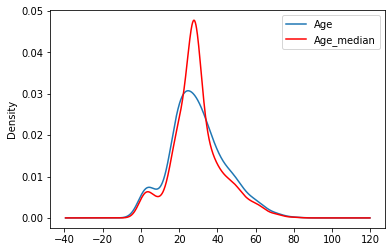

In [17]:
# doing matplotlib print of the distributions of Age and Age_median
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax=ax) # kde - kernel density estimators
df.Age_median.plot(kind = 'kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# the above graph spiked in the mid position since more median value is introduced in the null part of Age.

### Advantages and Disadvantages of Mean/ Meadian imputation

#### Advantages
1. Easy to implement( Robust to Outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or distortion in the original variance.
2. Impacts correlation

#### 2. Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [18]:
df = pd.read_csv('titanic/train.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
# %ge data missing or null
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

#### using sample to randomly pickup any value from Age after dropping all the NAN values
#### and then inserting NAN values to sample where the NAN values are getting filled with the generated random values and random_state param
#### to fix the randomly generated values to constant values inplace of NAN, the value will not change.
# random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)

#### here the NAN value at index 423 is filled by a random number 28.00 which remains same always.

In [21]:
# a function to impute NAN values
def impute_nan(df,var,median):
    df[var+"_median"] = df[var].fillna(median) # mean could be used but median will remove the outliers if any
    df[var+'_random'] = df[var]
    ## it will have the random sample to fill the NAN
    random_sample = df[var].dropna().sample(df[var].isnull().sum(), random_state = 0)
    ## Pandas needs to have same index in order to merge the dataset
    random_sample.index = df[df[var].isnull()].index
    ## wherever(index) there is null with the loc operation we are putting the random_sample value to var+'_random'
    df.loc[df[var].isnull(),var+'_random'] = random_sample
    # age_random is created with Random sample imputation
    

In [22]:
median = df['Age'].median()
impute_nan(df,'Age', median)
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [23]:
df[df['Age'].isna()].head(5)

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00


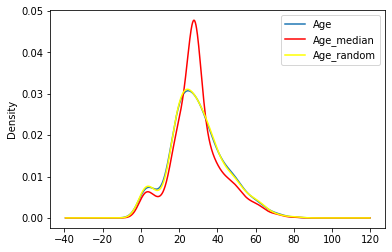

In [24]:
# doing matplotlib print of the distributions of Age and Age_median
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax=ax) # kde - kernel density estimators
df.Age_median.plot(kind = 'kde', ax=ax, color='red')
df.Age_random.plot(kind = 'kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### From the above plot its concluded that Random sample imputation works better than Mean/ median imputation as this process doesn't affects the distribution of the data.

##### Advantages
1. Easy to implement
2. There is less distortion in variance

##### Disadvantages
1. In every situation randomness won't work. Will work for competitions but business scenerion may not.


##### 3. Capturing NAN values with a new feature
This technique works well when data is not missing completely at random (MNAR).

In [25]:
df = pd.read_csv('titanic/train.csv', usecols = ['Age','Fare','Survived'])

In [26]:
# creating new feature and capturing the the null values as 1 and non null as 0
df['Age_NAN'] =np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [27]:
# now we replace the NaN with the median/ mode values
df['Age'].fillna(df.Age.median(), inplace = True)

In [28]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values like here marking them 1 and 0 the machine will understand some changes are made. The model will know the importsnce of the missingness.

#### Disadvantages
1. Creating Additional Features may lead to curse of Dimesnsionality.

#### 4. End of Distribution imputation
If there is suspicion that missing values is not at random (MNAR) the capturing that info is important.
We will take values from the far tail end of the distribution and replace NAN values with it.

In [29]:
df = pd.read_csv('titanic/train.csv', usecols = ['Age','Fare','Survived'])

<AxesSubplot:>

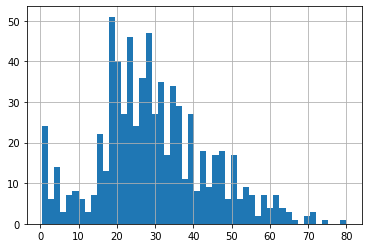

In [30]:
df.Age.hist(bins = 50)

In [31]:
df.Age.mean() # this gives the central data from the distribution

29.69911764705882

In [32]:
# To get the far right end(outliers as shown below is only in RHS) of the distribution we will pick data after the 3rd standard deviation
extremeValue = df.Age.mean() + 3*df.Age.std()

D:\OneDrive\python\STARTING UP\DataAnalyticsProjectsvenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

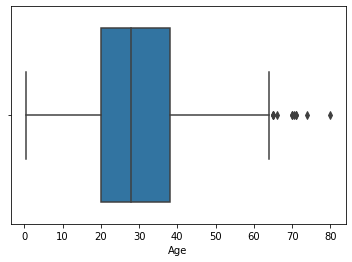

In [33]:
sns.boxplot('Age',data=df)

In [34]:
def impute_nan(df,var,median,extremeVal):
    df[var + "_end_distribution"] = df[var].fillna(extremeVal)
    df[var].fillna(median, inplace = True)

In [35]:
impute_nan(df,'Age',df.Age.median(), extremeValue)


In [36]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

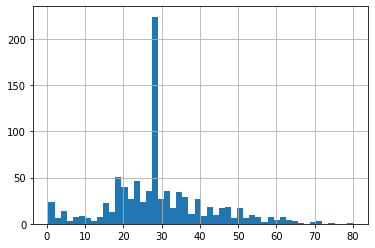

In [37]:
df['Age'].hist(bins=50) # large distortion of the variance as NAN values are replaced with median.

<AxesSubplot:>

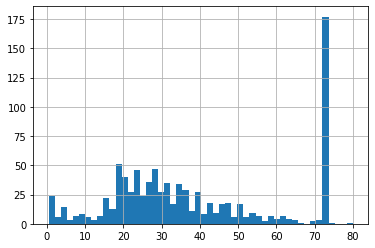

In [38]:
df['Age_end_distribution'].hist(bins=50) # after replacing NAN values with extreme right values the distribution spikes in the RHS

D:\OneDrive\python\STARTING UP\DataAnalyticsProjectsvenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

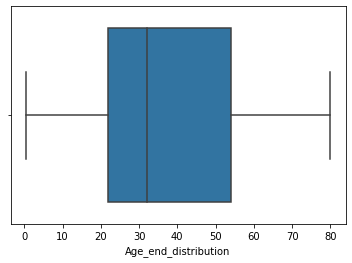

In [39]:
# we do box plot to check which one is better
sns.boxplot('Age_end_distribution', data=df)
# all the outliers came inside the distribution so no outliers anymore. Since outliers moved inside the distribution this approach
# can be considered for handling missing values. In this approach outliers are also getting handled :p :)

#### Advantages
1. Easy to implement
2. Captures the importance of missingness of the data if there is one.

#### Disadvantages
1. Distorts the original distribution of the variable.
2. If missingness is not important, it may mask the predictive power of the original variables by distorting its distribution.
3. If the number of NA is big, it will mask true outliers in the distribution.
4. If the number of NA is small, the replaed NA may be considered an outlier and preprocessed in a subsequent set of feature engineering.

##### 5. Arbitrary value Imputation
This technique was derived from Kaggle competition.
It consists of replacing NAN by an arbitrary value.

In [40]:
df = pd.read_csv('titanic/train.csv', usecols = ['Age','Fare','Survived'])

In [41]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### Arbitrary value is explained in https://youtu.be/dmt2R4A3W1Q 

##### 6. Frequent categories imputation

continued in house price prediction

##### 11. Ordinal Number Encoding - Used where categories can be ordered in such a way where we can assign ranks. Ex - grading system

In [42]:
import datetime

In [43]:
today_date = datetime.datetime.today()

In [44]:
today_date

datetime.datetime(2022, 7, 16, 1, 3, 47, 757982)

In [45]:
today_date - datetime.timedelta(1)  #press shift + tab inside the function to check documentation

datetime.datetime(2022, 7, 15, 1, 3, 47, 757982)

In [46]:
# list comprehension
days = [today_date - datetime.timedelta(x) for x in range(0,15)]

In [47]:
data = pd.DataFrame(days)

In [48]:
data.columns = ["Day"]

In [49]:
data.head()

,Day
0,2022-07-16 01:03:47.757982
1,2022-07-15 01:03:47.757982
2,2022-07-14 01:03:47.757982
3,2022-07-13 01:03:47.757982
4,2022-07-12 01:03:47.757982


In [50]:
# here we will do ordinal encoding by ranking various weekdays 
# refer to datetime library doc
data['weekday'] = data['Day'].dt.day_name()

In [51]:
data['Day'].dt.year # .month, .hour...

0     2022
1     2022
2     2022
3     2022
4     2022
5     2022
6     2022
7     2022
8     2022
9     2022
10    2022
11    2022
12    2022
13    2022
14    2022
Name: Day, dtype: int64

In [52]:
data.head()

,Day,weekday
0,2022-07-16 01:03:47.757982,Saturday
1,2022-07-15 01:03:47.757982,Friday
2,2022-07-14 01:03:47.757982,Thursday
3,2022-07-13 01:03:47.757982,Wednesday
4,2022-07-12 01:03:47.757982,Tuesday


In [53]:
dictionary = {'Monday':1, 'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

In [54]:
data['weekday_ordinal'] = data['weekday'].map(dictionary)
data

,Day,weekday,weekday_ordinal
0,2022-07-16 01:03:47.757982,Saturday,6
1,2022-07-15 01:03:47.757982,Friday,5
2,2022-07-14 01:03:47.757982,Thursday,4
3,2022-07-13 01:03:47.757982,Wednesday,3
4,2022-07-12 01:03:47.757982,Tuesday,2
5,2022-07-11 01:03:47.757982,Monday,1
6,2022-07-10 01:03:47.757982,Sunday,7
7,2022-07-09 01:03:47.757982,Saturday,6
8,2022-07-08 01:03:47.757982,Friday,5
9,2022-07-07 01:03:47.757982,Thursday,4


##### 12. Count or Frequency encoding

In [55]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
len(train_set[1].unique())

9

In [57]:
# taking columns which has categorical features
columns = [1,3,5,6,7,8,9,13]
train_set = train_set[columns]
train_set.columns = ['Employment', 'Degree', 'Status', 'Designation', 'family_job', 'Race', 'Sex', 'Country']

In [58]:
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [59]:
for column in train_set.columns:
    print("{} is -------- {} labels".format(column, len(train_set[column].unique())))

Employment is -------- 9 labels
Degree is -------- 16 labels
Status is -------- 7 labels
Designation is -------- 15 labels
family_job is -------- 6 labels
Race is -------- 5 labels
Sex is -------- 2 labels
Country is -------- 42 labels


In [60]:
# wwe will perform  Count or Frequency encoding on categories having more labels. Country
# here the whole Country feature will be replaced by something else...?

In [61]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [62]:
# ? handling can be done using the above mentioned techniques or can be dropped replacing it with NAN

In [63]:
train_set['Country'].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [64]:
# now we will map these categories with the frequency.
country_map = train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [65]:
train_set['Country'] = train_set['Country'].map(country_map)
train_set.head(5)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


##### Advantages
1. Easy to use
2. we are not increasing the feature space.
##### Disadvantages
1. It will provide the same weight if the frequencies are same

##### 13. Target guided ordinal encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probablity of being 1 or 0

In [66]:
df = pd.read_csv('titanic/train.csv', usecols=['Cabin', 'Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [67]:
# fixing NaN values
df['Cabin'].fillna('Missing',inplace=True)

In [68]:
df.head(10)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [69]:
# the C, E,.. states the seat number block so we consider only them
df['Cabin'] = df['Cabin'].astype(str).str[0]
df['Cabin'].unique() # this is target guiding, here the target is the most important thing.

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [70]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index # probablity of surviving from each cabin from lowest to highest

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [71]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index # ordinal encoding

In [72]:
# now we will map these ordinal encodings with numbers
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels, 0)}
ordinal_labels2 # here the D has highest chance of survival so encoded with highest no. 8

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [73]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(ordinal_labels2)

In [74]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


##### 14. Mean Encoding
here the categories are encoded with their mean values

In [75]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().sort_values().to_dict()

In [76]:
df['Cabin_mean_ordinal_encode'] = df['Cabin'].map(mean_ordinal)

In [77]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels,Cabin_mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


##### Advantages
1. it captures information within the label therefore rendering more predictive features
2. It creates a monotonic relationship between variable and target

##### Disadvantages
1. It is prone to overfitting.

##### 15. Probablity Ratio Encoding

In [93]:
df = pd.read_csv('titanic/train.csv', usecols=['Cabin', 'Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [94]:
# fixing NaN values
df['Cabin'].fillna('Missing', inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [95]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [96]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [97]:
df.head(10)

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
5,0,M
6,0,E
7,0,M
8,1,M
9,1,M


In [98]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [99]:
# probablity
prob_df = df.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df.head(9)

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [100]:
# to find the probablity of passengers has DIED
prob_df['Died'] = 1 - prob_df['Survived']
prob_df.sort_values('Died')

,Survived,Died
Cabin,,
D,0.757576,0.242424
E,0.750000,0.250000
B,0.744681,0.255319
F,0.615385,0.384615
C,0.593220,0.406780
G,0.500000,0.500000
A,0.466667,0.533333
M,0.299854,0.700146
T,0.000000,1.000000


In [101]:
# to get probablity ratio = P(Survived)/P(Died)
prob_df['prob_ratio'] = prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [102]:
prob_ratio_dict = prob_df['prob_ratio'].to_dict()

In [104]:
df['Cabin_encoded'] = df['Cabin'].map(prob_ratio_dict)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


In [ ]:
# now we can use Cabin_encoded column for model creation and drop the Cabin column